<a href="https://colab.research.google.com/github/Nodis6/Euler_Maruyama/blob/main/Euler_Maruyama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

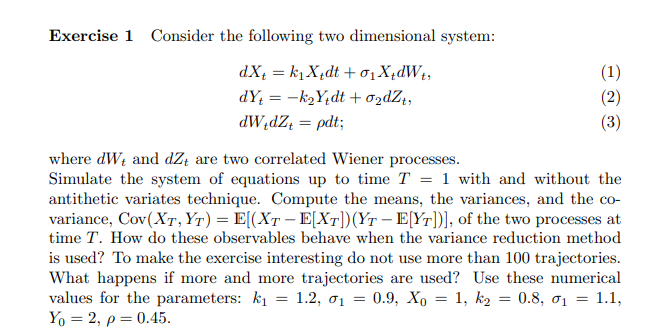

In [141]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

# No variance reduction

## Preparing function

In [ ]:
Samples = 100
N = 10000
T = 1
t = T/N

k_1 = 1.2
k_2 = 0.8
sigma_1 = 0.9
sigma_2 = 1.1
X_0 = 1
Y_0 = 2
p = 0.45

In [ ]:
X = np.zeros([Samples, N+1])
Y = np.zeros([Samples, N+1])
W_process = np.zeros(N+1)
Z_process = np.zeros(N+1)

In [ ]:
# making processes
for i in range(Samples):
  X[i,0] = X_0
  Y[i,0] = Y_0
  for j in range(N):
    W_prim = np.sqrt(t) * np.random.normal()
    W_bis = np.sqrt(t) * np.random.normal()
    W = W_prim + p* W_bis
    Z = p * W_prim + np.sqrt(1 - p*p) * W_bis
    if i == 0:
      W_process[j+1] = W_process[j] + W
      Z_process[j+1] = Z_process[j] + Z
    X[i, j+1] = X[i, j] + k_1 * X[i, j] * t + sigma_1 * X[i, j] * W
    Y[i, j+1] = Y[i, j] - k_2 * Y[i, j] * t + sigma_2 * Z


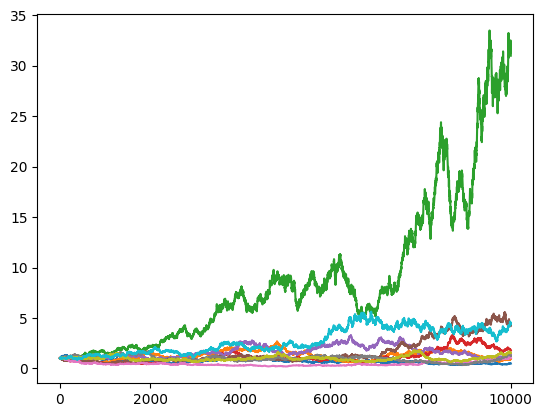

In [ ]:
for i in range(10):
  plt.plot(X[i, :])

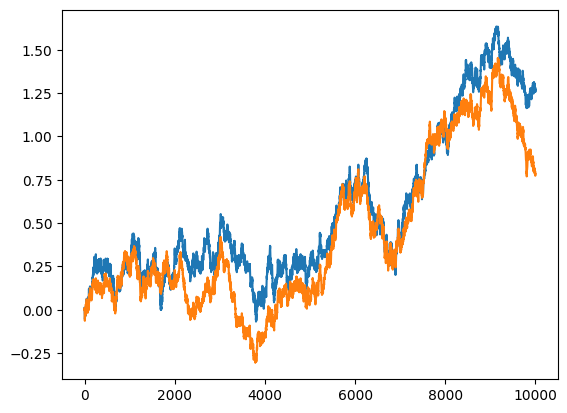

In [ ]:
plt.plot(W_proc)
plt.plot(Z_proc)
plt.show()

Expected value and variance for geometric brownian motion are given as:
* $E(X_T) = X_0 e^{\mu T}$
* $Var(X_T) = X_0^2 e^{2 \mu T}(e^{\sigma^2 T} - 1)$
and for Ornstein-Uhlenbeck:
* $E(Y_T) = 0 + (Y_0 - 0)e^{-k_2(T-0)} = Y_0e^{-k_2T}$
* $Var(Y_T) = \frac{\sigma_2^2}{2k_2}(1 - e^{-2k_2(T-0)}) = \frac{\sigma_2^2}{2k_2}(1 - e^{-2k_2T})$

In [ ]:
# taking last value for each process
X_T = X[:, -1]
Y_T = Y[:, -1]

real_mean_X = X_0 * np.exp(k_1 * T)
mean_X = np.mean(X_T)

real_variance_X = X_0 * X_0 * np.exp(2 * k_1 * T) * (np.exp(sigma_1 * sigma_1 * T) - 1)
variance_X = np.var(X_T)

print("For X:")
print("Expected value from simulation =", mean_X)
print("Expected value theoretical = ", real_mean_X)
print("Variance from simulation =", variance_X)
print("Variance theoretical = ", real_variance_X)

real_mean_Y = Y_0 * np.exp(-k_2*T)
mean_Y = np.mean(Y_T)

real_variance_Y = sigma_2 * sigma_2 / (2 * k_2) * (1 - np.exp(-2 * k_2 * T))
variance_Y = np.var(Y_T)

print("For Y:")
print("Expected value from simulation =", mean_Y)
print("Expected value theoretical = ", real_mean_Y)
print("Variance from simulation =", variance_Y)
print("Variance theoretical = ", real_variance_Y)

For X:
Expected value from simulation = 3.293202555789855
Expected value theoretical =  3.3201169227365472
Variance from simulation = 11.961649902099191
Variance theoretical =  13.755909843946098
For Y:
Expected value from simulation = 0.9097486126882786
Expected value theoretical =  0.8986579282344431
Variance from simulation = 0.5198836970460744
Variance theoretical =  0.6035657582665419


## Definition

Let's put everything in one definition.

In [ ]:
def Euler_Maruyama(Samples=100, N=1000, T=1, k_1=1.2, k_2=0.8,
                   sigma_1=0.9, sigma_2=1.1, X_0=1, Y_0=2, p=0.45):
  t = T/N
  W_proc = np.zeros(N + 1)
  Z_proc = np.zeros(N + 1)
  X = np.zeros([Samples, N+1])
  Y = np.zeros([Samples, N+1])

  for i in range(Samples):
    X[i, 0] = X_0
    Y[i, 0] = Y_0
    for j in range(N):
      # making two correlated processes based on classes
      # W1 = np.sqrt(t) * np.random.normal()
      # W2 = np.sqrt(t) * np.random.normal()
      # W = W1 + p * W2
      # Z = p * W1 + np.sqrt(1 - p**2) * W2

      # making two correlated processes based on prof. M. Capinski
      W = np.sqrt(t) * np.random.normal()
      W2 = np.sqrt(t) * np.random.normal()
      Z = p * W + np.sqrt(1 - p**2) * W2

      # processes to check paths, plot
      # if i == 0:
      #   W_proc[j + 1] = W_proc[j] + W
      #   Z_proc[j + 1] = Z_proc[j] + Z

      X[i, j+1] = X[i, j] + k_1 * X[i, j] * t + sigma_1 * X[i, j] * W
      Y[i, j+1] = Y[i, j] - k_2 * Y[i, j] * t + sigma_2 * Z

# taking last value for each process
  X_T = X[:, -1]
  Y_T = Y[:, -1]

  real_mean_X = X_0 * np.exp(k_1 * T)
  mean_X = np.mean(X_T)

  real_variance_X = X_0 * X_0 * np.exp(2 * k_1 * T) * (np.exp(sigma_1 * sigma_1 * T) - 1)
  variance_X = np.var(X_T)

  print("For X:")
  print("Expected value from simulation =", mean_X)
  print("Expected value theoretical = ", real_mean_X)
  print("Variance from simulation =", variance_X)
  print("Variance theoretical = ", real_variance_X)

  real_mean_Y = Y_0 * np.exp(-k_2*T)
  mean_Y = np.mean(Y_T)

  real_variance_Y = sigma_2 * sigma_2 / (2 * k_2) * (1 - np.exp(-2 * k_2 * T))
  variance_Y = np.var(Y_T)

  print("For Y:")
  print("Expected value from simulation =", mean_Y)
  print("Expected value theoretical = ", real_mean_Y)
  print("Variance from simulation =", variance_Y)
  print("Variance theoretical = ", real_variance_Y)

In [ ]:
Euler_Maruyama()

Expected value from simulation = 4.022254411710507
Expected value theoretical =  3.3201169227365472
Variance from simulation = 22.42942376317722
Variance theoretical =  13.755909843946098
Expected value from simulation = 0.8997113208812766
Expected value theoretical =  0.8986579282344431
Variance from simulation = 0.5143734711001511
Variance theoretical =  0.6035657582665419


# Variance reduction

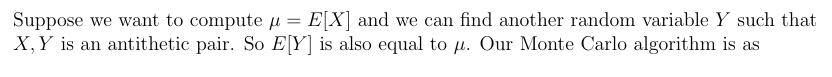

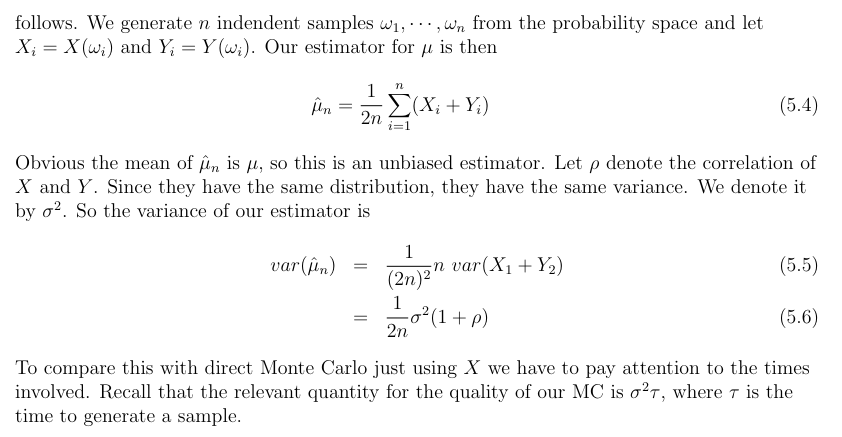

## Function

In [121]:
X = np.zeros([Samples, N+1])
Y = np.zeros([Samples, N+1])
X_add = np.zeros([Samples, N+1])
Y_add = np.zeros([Samples, N+1])
W_process = np.zeros(N+1)
Z_process = np.zeros(N+1)

In [127]:
# making processes with variance reduction
for i in range(Samples):
  X[i,0] = X_0
  X_add[i, 0] = X_0
  Y[i,0] = Y_0
  Y_add[i, 0] = Y_0
  for j in range(N):
    W = np.sqrt(t) * np.random.normal()
    W2 = np.sqrt(t) * np.random.normal()
    Z = p * W + np.sqrt(1 - p**2) * W2
    # if i == 0:
    #   W_process[j+1] = W_process[j] + W
    #   Z_process[j+1] = Z_process[j] + Z
    X[i, j+1] = X[i, j] + k_1 * X[i, j] * t + sigma_1 * X[i, j] * W
    Y[i, j+1] = Y[i, j] - k_2 * Y[i, j] * t + sigma_2 * Z
    # doing additional processes
    X_add[i, j+1] = X_add[i, j] + k_1 * X_add[i, j] * t + sigma_1 * X_add[i, j] * (- W)
    Y_add[i, j+1] = Y_add[i, j] - k_2 * Y_add[i, j] * t + sigma_2 * (- Z)

In [128]:
X_T = X[:, -1]
Y_T = Y[:, -1]
X_add_T = X_add[:, -1]
Y_add_T = Y_add[:, -1]

In [129]:
mean_X_with_reducution = 1 / (2 * Samples) * np.sum(X_T + X_add_T)
mean_X = np.mean(X_T)
print("Expected value from simulation =", mean_X)
print("Expected value theoretical = ", real_mean_X)
print("Expected value from simulation with variance reduction =", mean_X_with_reducution)

Expected value from simulation = 3.1466127562777557
Expected value theoretical =  3.3201169227365472
Expected value from simulation with variance reduction = 3.2463491064326155


In [ ]:
mean_Y_with_reducution = 1 / (2 * Samples) * np.sum(Y_T + Y_add_T)
mean_Y = np.mean(Y_T)
print("Expected value from simulation =", mean_Y)
print("Expected value theoretical = ", real_mean_Y)
print("Expected value from simulation with variance reduction =", mean_Y_with_reducution)

Expected value from simulation = 0.9251381285187551
Expected value theoretical =  0.8986579282344431
Expected value from simulation with variance reduction = 0.8986291701070946


## Definition

In [144]:
def Euler_Maruyama_var_red(Samples=100, N=1000, T=1, k_1=1.2, k_2=0.8,
                   sigma_1=0.9, sigma_2=1.1, X_0=1, Y_0=2, p=0.45):
  t = T/N
  W_proc = np.zeros(N + 1)
  Z_proc = np.zeros(N + 1)
  X = np.zeros([Samples, N+1])
  Y = np.zeros([Samples, N+1])
  X_add = np.zeros([Samples, N+1])
  Y_add = np.zeros([Samples, N+1])

  for i in range(Samples):
    X[i,0] = X_0
    X_add[i, 0] = X_0
    Y[i,0] = Y_0
    Y_add[i, 0] = Y_0
    for j in range(N):
      # making two correlated processes based on classes
      # W1 = np.sqrt(t) * np.random.normal()
      # W2 = np.sqrt(t) * np.random.normal()
      # W = W1 + p * W2
      # Z = p * W1 + np.sqrt(1 - p**2) * W2

      # making two correlated processes based on prof. M. Capinski
      W = np.sqrt(t) * np.random.normal()
      W2 = np.sqrt(t) * np.random.normal()
      Z = p * W + np.sqrt(1 - p**2) * W2

      # processes to check paths, plot
      # if i == 0:
      #   W_proc[j + 1] = W_proc[j] + W
      #   Z_proc[j + 1] = Z_proc[j] + Z

      X[i, j+1] = X[i, j] + k_1 * X[i, j] * t + sigma_1 * X[i, j] * W
      Y[i, j+1] = Y[i, j] - k_2 * Y[i, j] * t + sigma_2 * Z
      X_add[i, j+1] = X_add[i, j] + k_1 * X_add[i, j] * t + sigma_1 * X_add[i, j] * (- W)
      Y_add[i, j+1] = Y_add[i, j] - k_2 * Y_add[i, j] * t + sigma_2 * (- Z)
# taking last value for each process
  X_T = X[:, -1]
  Y_T = Y[:, -1]
  X_add_T = X_add[:, -1]
  Y_add_T = Y_add[:, -1]

  real_mean_X = X_0 * np.exp(k_1 * T)
  mean_X = np.mean(X_T)
  mean_X_with_reducution = 1 / (2 * Samples) * np.sum(X_T + X_add_T)
  real_variance_X = X_0 * X_0 * np.exp(2 * k_1 * T) * (np.exp(sigma_1 * sigma_1 * T) - 1)
  variance_X = np.var(X_T)
  variance_X_estimator = (sigma_1 **2 * (1 + p))/(2 * Samples)
  var_X_red = (np.var(X_T) + np.var(X_add_T) - 2 * np.cov(X_T, X_add_T)[0][1])/ 4

  print("For X:")
  print("Expected value from simulation =", mean_X)
  print("Expected value theoretical = ", real_mean_X)
  print("Expected value from simulation with variance reduction =", mean_X_with_reducution)
  print("Variance for mean estimator =", variance_X_estimator)
  print("Variance from simulation =", variance_X)
  print("Variance theoretical = ", real_variance_X)
  print("Variance from simulation with reduction= ", var_X_red)


  real_mean_Y = Y_0 * np.exp(-k_2*T)
  mean_Y = np.mean(Y_T)
  mean_Y_with_reducution = 1 / (2 * Samples) * np.sum(Y_T + Y_add_T)

  real_variance_Y = sigma_2 * sigma_2 / (2 * k_2) * (1 - np.exp(-2 * k_2 * T))
  variance_Y = np.var(Y_T)
  variance_Y_estimator = (sigma_2 **2 * (1 + p))/(2 * Samples)
  var_Y_red = (np.var(Y_T) + np.var(Y_add_T) - 2 * np.cov(Y_T, Y_add_T)[0][1])/ 4

  print("For Y:")
  print("Expected value from simulation =", mean_Y)
  print("Expected value theoretical = ", real_mean_Y)
  print("Expected value from simulation with variance reduction =", mean_Y_with_reducution)
  print("Variance for mean estimator =", variance_X_estimator)
  print("Variance from simulation =", variance_Y)
  print("Variance theoretical = ", real_variance_Y)
  print("Variance from simulation with reduction= ", var_Y_red)


In [145]:
Euler_Maruyama_var_red()

For X:
Expected value from simulation = 4.056436291077997
Expected value theoretical =  3.3201169227365472
Expected value from simulation with variance reduction = 3.717288107544458
Variance for mean estimator = 0.0058725
Variance from simulation = 29.708060081850963
Variance theoretical =  13.755909843946098
Variance from simulation with reduction=  16.42023043066877
For Y:
Expected value from simulation = 0.8929190096693067
Expected value theoretical =  0.8986579282344431
Expected value from simulation with variance reduction = 0.8983702502898657
Variance for mean estimator = 0.0058725
Variance from simulation = 0.6706198588792371
Variance theoretical =  0.6035657582665419
Variance from simulation with reduction=  0.6740068278634752
